In [1]:
import pandas as pd, numpy as np, seaborn as sns

In [2]:
tg_reviews = pd.read_csv('../data/target_reviews_clean.csv')
tg_reviews['verified_purchaser'] = tg_reviews['verified_purchaser'].astype(bool)
tg_reviews.rename({'verified_purchaser':'verified_purchase'},inplace=True,axis=1)
tg_reviews = tg_reviews.drop(['url'],axis=1)
am_reviews = pd.read_excel('../data/Amazon_Review_data_all.xlsx')
am_reviews = am_reviews.drop(['ReviewID'],axis=1)
bb_reviews = pd.read_excel('../data/BB_Review_data.xlsx')
bb_reviews = bb_reviews.drop(['ReviewID'],axis=1)

display(
    tg_reviews.head(),
    am_reviews.head(),
    bb_reviews.head()
)

#all_reviews = pd.concat([tg_reviews,am_reviews,bb_reviews])
#all_reviews

,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length
0,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,False,1,target1,en,0.375000,0.750000,104
1,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,False,1,target1,en,0.403283,0.714646,218
2,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,False,1,target1,en,0.312121,0.551515,39
3,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,False,1,target1,en,0.242424,0.396970,83
4,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,False,1,target1,en,0.437500,0.800000,41


,productID,prodSiteID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase
0,1,Amazon1,Wonderful product and would recommend!,S&K,I had an older android and was having a hard t...,5,11,True
1,1,Amazon1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,0,True
2,1,Amazon1,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True
3,1,Amazon1,Brick Stolen Device,Dana Rajc,If I could send negative stars I would. The ph...,1,24,True
4,1,Amazon1,Minimum,Dennis Deckmann,Minimum quality. Seems to pick up noise. Not v...,4,0,True


,productID,prodSiteID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase
0,1,BB1,Awesome experience all around,AmandaD,"Husband upgraded from a 12 to a 14, loves it. ...",5,0,True
1,1,BB1,Great phone,MauraC,It’s a pretty great phone. It has all that I n...,5,0,True
2,1,BB1,It’s an iPhone,Peachy,"It’s a unlocked iPhone, I was able to pick up ...",5,0,True
3,1,BB1,Hello….Can You Hear Me Now?,PauletteP,Apple products are very good products but of c...,5,0,True
4,1,BB1,Great!!,AnthonyC,Awesome product love it so much. I would recom...,5,0,True


In [3]:
all_reviews = pd.concat([tg_reviews,am_reviews,bb_reviews])
all_reviews

,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length
0,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,False,1,target1,en,0.375000,0.750000,104.0
1,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,False,1,target1,en,0.403283,0.714646,218.0
2,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,False,1,target1,en,0.312121,0.551515,39.0
3,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,False,1,target1,en,0.242424,0.396970,83.0
4,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,False,1,target1,en,0.437500,0.800000,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26185,Returned this product,TraceyPortchester,did not have the capacity to safeguard all of ...,1,0,True,3,BB3,NaN,NaN,NaN,NaN
26186,forget BB,Deede,Received in email but not downloadable. Geek ...,1,0,True,3,BB3,NaN,NaN,NaN,NaN
26187,Decent product,RamonI,It’s a good antivirus program it does keep my ...,4,0,True,3,BB3,NaN,NaN,NaN,NaN
26188,Works great,GracieW,"Works great, never had a problem with it, will...",5,0,True,3,BB3,NaN,NaN,NaN,NaN


In [4]:
all_reviews = all_reviews.reset_index()

In [5]:
#all_reviews = all_reviews.drop(['index'],axis=1)
all_reviews

,index,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length
0,0,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,False,1,target1,en,0.375000,0.750000,104.0
1,1,Loving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,False,1,target1,en,0.403283,0.714646,218.0
2,2,Nice phone,Brandi R,My daughter really likes her new phone.,5,0,False,1,target1,en,0.312121,0.551515,39.0
3,3,Apple Iphone 14 purchase,Larry Justin,The Apple Iphone 14 is well worth the price. E...,5,0,False,1,target1,en,0.242424,0.396970,83.0
4,4,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,False,1,target1,en,0.437500,0.800000,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42798,26185,Returned this product,TraceyPortchester,did not have the capacity to safeguard all of ...,1,0,True,3,BB3,NaN,NaN,NaN,NaN
42799,26186,forget BB,Deede,Received in email but not downloadable. Geek ...,1,0,True,3,BB3,NaN,NaN,NaN,NaN
42800,26187,Decent product,RamonI,It’s a good antivirus program it does keep my ...,4,0,True,3,BB3,NaN,NaN,NaN,NaN
42801,26188,Works great,GracieW,"Works great, never had a problem with it, will...",5,0,True,3,BB3,NaN,NaN,NaN,NaN


In [6]:
all_revs_arr = all_reviews.to_dict('records')


In [7]:
import textblob
from langdetect import detect

# import multiprocessing as mp



In [8]:
# def add_fix_cols(record):
#     #check spelling
#     record['review_conent'] = str(textblob.TextBlob(record['review_content']).correct())
#     record['review_header'] = str(textblob.TextBlob(record['review_header']).correct())
#     lang = None 
#     try:
#         lang = detect(
#             ''.join(w.lower() if w.isalpha() else " " for w in record['review_content'])
#         )
#     except:
#         lang = 'Unk'
#     record['review_lang'] = lang

#     blob = textblob.TextBlob(record['review_header']+' '+record['review_content'])
#     record['review_polarity'] = blob.polarity
#     record['review_subjectivity'] = blob.subjectivity
#     return record

# # if __name__ == '__main__':
# with mp.Pool(16) as p:
#     p.map(add_fix_cols,all_revs_arr)

In [9]:
# all_revs = pd.DataFrame.from_dict(all_revs_arr)
# all_revs['review_lang'].value_counts()

In [12]:
import textblob
from langdetect import detect

# import multiprocessing as mp



#detect lanaguages for reviews.
all_reviews['review_lang'] = ''
for i,row in all_reviews.iterrows():
    #try to use spellcheck and fix if the content or header is misspelled
    blob = textblob.TextBlob(str(row['review_content']))
    all_reviews.loc[i,'review_content'] = str(blob.correct())
    blob = textblob.TextBlob(str(row['review_header']))
    all_reviews.loc[i,'review_header'] = str(blob.correct())

    #try to classify the language of the review
    lang=None
    try:
        lang = detect(
            ''.join(w.lower() if w.isalpha() else " " for w in row['review_content'])
        )
    except:
        lang = 'Unk'
    
    blob = textblob.TextBlob(str(row['review_header'])+' '+str(row['review_content']))

    all_reviews.loc[i,'review_lang'] = lang
    all_reviews.loc[i,'review_polarity'] = blob.polarity
    all_reviews.loc[i,'review_subjectivity'] = blob.subjectivity

    #print(detect''.join(w.lower() if w.isalpha else " " for w in row['review_content']))
    # print(detect(
    #     ''.join(w.lower() if w.isalpha else " " for w in row['review_content'])
    # ))
    #print(detect(row['review_content']))
all_reviews.value_counts(subset=['review_lang'])

review_lang
en             42504
es                58
af                42
no                20
so                20
fr                19
da                18
ro                18
sl                15
ca                14
it                11
fi                 7
cy                 7
sq                 6
tl                 5
nl                 5
sk                 4
Unk                4
id                 4
hu                 4
pt                 3
hr                 3
et                 3
sv                 3
tr                 3
pl                 1
sw                 1
cs                 1
Name: count, dtype: int64

In [13]:
all_reviews[all_reviews['review_lang']!='en']

,index,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length
129,129,Lids are happy,Do it,Great upgrade for my tens,5,0,False,1,target1,sv,0.800000,0.875000,26.0
342,342,New shone,Mspennij,I really like my new phone,5,0,False,1,target1,no,0.157576,0.369697,26.0
363,363,Good,NaN,Good and it’s looking nice,5,0,False,1,target1,tl,0.666667,0.733333,26.0
5811,5811,Egg,A,I just got it it is awesome,5,3,False,8,target8,nl,1.000000,1.000000,27.0
6927,6927,Simple and quick,ruffuss,I just like it and it is good looking and use ...,5,0,False,10,target10,af,0.344444,0.485714,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41925,25312,Like it!,Good,"Like it, like it, like it, like it, like it, l...",5,0,True,1,BB1,sq,0.000000,0.000000,NaN
42038,25425,Now,JosephP,Run and amazing! The sequel to Red Fallen Orde...,5,0,True,1,BB1,da,0.445833,0.700000,NaN
42210,25597,good price,MichaelL,"good pp protection for a great price, can prot...",5,0,True,2,BB2,ro,0.550000,0.487500,NaN
42341,25728,Antivirus,GilbertoG,"Good good,it is fine, I like to work, It is ve...",5,0,True,2,BB2,af,0.560000,0.700000,NaN


In [15]:
all_reviews.to_csv('../data/master_review_frame.csv')

In [21]:
all_reviews['prodSiteID'].value_counts()
all_reviews['site'] = np.select(
    [
        all_reviews['prodSiteID'].str.contains('BB'),
        all_reviews['prodSiteID'].str.contains('target'),
        all_reviews['prodSiteID'].str.contains('Amazon')
    ],
    [
        'BestBuy',
        'Target',
        'Amazon'
    ]
)

<Axes: xlabel='review_subjectivity', ylabel='review_polarity'>

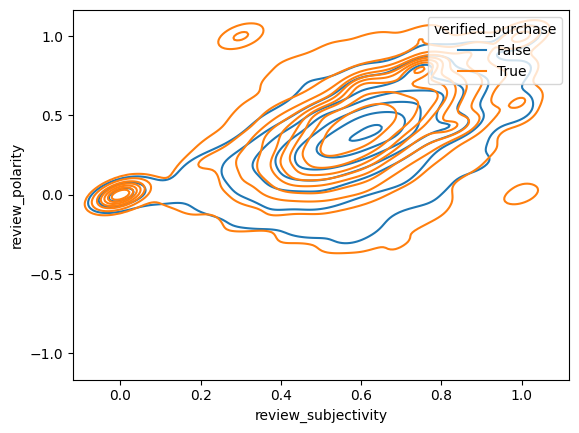

In [33]:
sns.kdeplot(
    data=all_reviews,
    x='review_subjectivity',
    y='review_polarity',hue='verified_purchase'
)

<Axes: xlabel='review_length', ylabel='Density'>

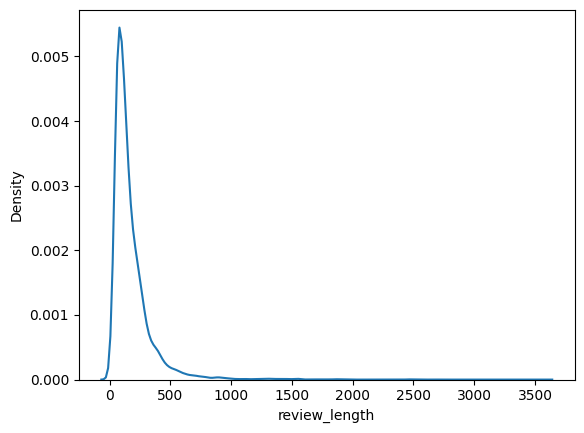

In [32]:
sns.kdeplot(
    data=all_reviews[~all_reviews['review_length'].isna()],x='review_length'
)

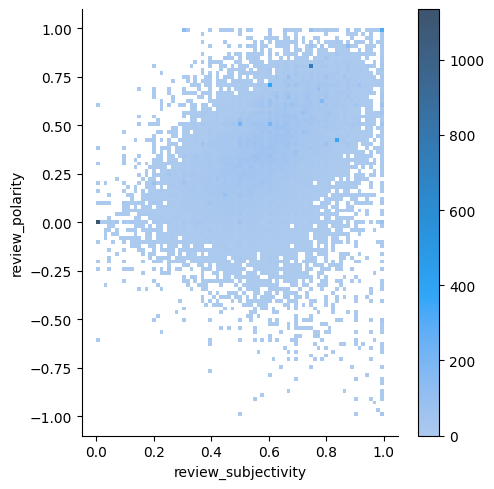

In [19]:
sns.displot(
    data=all_reviews,
    x='review_subjectivity',
    y='review_polarity',
    cbar=True
)

In [35]:
part_reviews = pd.DataFrame(all_reviews[all_reviews['site']!='Amazon'])
part_reviews['site'].value_counts()

site
BestBuy    26190
Target     14536
Name: count, dtype: int64

,productID,prodSiteID,ReviewID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,review_length,site
0,1,Amazon1,1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.604943,0.273504,282.0,Amazon
1,1,Amazon1,2,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.513636,0.484091,138.0,Amazon
2,1,Amazon1,3,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.570455,0.333636,373.0,Amazon
3,1,Amazon1,4,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,0.000000,0.000000,83.0,Amazon
4,1,Amazon1,5,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.727273,0.568182,170.0,Amazon


In [37]:
part_reviews.head()

,index,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length,site
0,0,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,False,1,target1,en,0.375000,0.750000,104.0,Target
1,1,Moving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,False,1,target1,en,0.333939,0.667576,218.0,Target
2,2,Vice phone,Brandi R,By daughter really likes her new phone.,5,0,False,1,target1,en,0.168182,0.327273,39.0,Target
3,3,Apple Shone 14 purchase,Larry Justin,The Apple Shone 14 is well worth the price. Ea...,5,0,False,1,target1,en,0.242424,0.396970,83.0,Target
4,4,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,False,1,target1,en,0.437500,0.800000,41.0,Target


In [39]:
part_reviews=part_reviews.drop(['index'],axis=1)

In [40]:
part_reviews.head()

,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length,site
0,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,False,1,target1,en,0.375000,0.750000,104.0,Target
1,Moving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,False,1,target1,en,0.333939,0.667576,218.0,Target
2,Vice phone,Brandi R,By daughter really likes her new phone.,5,0,False,1,target1,en,0.168182,0.327273,39.0,Target
3,Apple Shone 14 purchase,Larry Justin,The Apple Shone 14 is well worth the price. Ea...,5,0,False,1,target1,en,0.242424,0.396970,83.0,Target
4,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,False,1,target1,en,0.437500,0.800000,41.0,Target


In [116]:
az_reviews = pd.read_excel('../data/Amazon_reviews_with_scores.xlsx')
az_reviews['site'] = 'Amazon'
az_reviews.head()

az_reviews['review_lang'] = ''

def correct_spelling(data):
    return str(textblob.TextBlob(data).correct())

def get_lang(data):
    lang = None
    try:
        lang = detect(
            ''.join(
                w.lower() if w.isalpha() else " " for w in data
            )
        )
    except:
        lang = 'Unk'
    return lang

def get_sentiments(data):
    res = textblob.TextBlob(
        data
    )
    return [res.subjectivity,res.polarity]


# az_reviews['review_content'] = az_reviews.apply(
#     lambda row: correct_spelling(str(row['review_content'])),axis = 1
# )

# az_reviews['review_lang'] = az_reviews.apply(
#     lambda row: get_lang(str(row['review_content'])), axis = 1
# )

# az_reviews[['review_subjectivity','review_polarity']]=az_reviews.apply(
#     lambda row: get_sentiments(str(row['review_header'])+ ' '+ str(row['review_content'])),axis=1
# )

# for i,row in az_reviews.iterrows():
#     #try to use spellcheck and fix if the content or header is misspelled
#     blob = textblob.TextBlob(str(row['review_content']))
#     az_reviews.loc[i,'review_content'] = str(blob.correct())
#     blob = textblob.TextBlob(str(row['review_header']))
#     az_reviews.loc[i,'review_header'] = str(blob.correct())

#     #try to classify the language of the review
#     lang=None
#     try:
#         lang = detect(
#             ''.join(w.lower() if w.isalpha() else " " for w in row['review_content'])
#         )
#     except:
#         lang = 'Unk'
    
#     blob = textblob.TextBlob(str(row['review_header'])+' '+str(row['review_content']))

#     az_reviews.loc[i,'review_lang'] = lang
#     az_reviews.loc[i,'review_polarity'] = blob.polarity
#     az_reviews.loc[i,'review_subjectivity'] = blob.subjectivity

    #print(detect''.join(w.lower() if w.isalpha else " " for w in row['review_content']))
    # print(detect(
    #     ''.join(w.lower() if w.isalpha else " " for w in row['review_content'])
    # ))
    #print(detect(row['review_content']))

In [117]:
az_reviews

,productID,prodSiteID,ReviewID,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,review_subjectivity,review_polarity,review_length,site,review_lang
0,1,Amazon1,1,It is renewed but looked like new,Andre,"It was packaged very well, Amazon packaging, n...",5,1,True,0.604943,0.273504,282.0,Amazon,
1,1,Amazon1,2,Worth it,Alice,"The phone came in perfect conditions, without ...",5,2,True,0.513636,0.484091,138.0,Amazon,
2,1,Amazon1,3,Amazon Warehouse for the Win!,Mrs. K,I got a great deal on this at Amazon Warehouse...,5,2,True,0.570455,0.333636,373.0,Amazon,
3,1,Amazon1,4,Awesome,David Chaves Rojas,"Got my phone, 10/10. No scratches, still have ...",5,0,True,0.000000,0.000000,83.0,Amazon,
4,1,Amazon1,5,Like new iPhone 14,Rick,The iPhone 14 came with a battery that had 100...,5,0,True,0.727273,0.568182,170.0,Amazon,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,24,Amazon24,373,Anonymous,roxanna,Only received part of the sofa. Should I expec...,1,2,True,1.000000,0.000000,64.0,Amazon,
5349,24,Amazon24,374,Do not buy very uncomfortable,Savannah,Very small and uncomfortable,1,1,True,0.760000,-0.412500,28.0,Amazon,
5350,24,Amazon24,375,Nice,Linda,Parts were not marked,1,2,True,0.600000,-0.050000,21.0,Amazon,
5351,24,Amazon24,376,Incomplete shipping,James brown,Only came with one half,1,8,True,0.583333,-0.083333,23.0,Amazon,


In [45]:
full_review_list = pd.concat([part_reviews,az_reviews]).reset_index().drop(['index'],axis=1)

In [46]:
full_review_list

,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length,site,ReviewID
0,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,False,1,target1,en,0.375000,0.750000,104.0,Target,NaN
1,Moving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,False,1,target1,en,0.333939,0.667576,218.0,Target,NaN
2,Vice phone,Brandi R,By daughter really likes her new phone.,5,0,False,1,target1,en,0.168182,0.327273,39.0,Target,NaN
3,Apple Shone 14 purchase,Larry Justin,The Apple Shone 14 is well worth the price. Ea...,5,0,False,1,target1,en,0.242424,0.396970,83.0,Target,NaN
4,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,False,1,target1,en,0.437500,0.800000,41.0,Target,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46074,Anonymous,roxanna,Only received part of the sofa. Should I expec...,1,2,True,24,Amazon24,NaN,0.000000,1.000000,64.0,Amazon,373.0
46075,Do not buy very uncomfortable,Savannah,Very small and uncomfortable,1,1,True,24,Amazon24,NaN,-0.412500,0.760000,28.0,Amazon,374.0
46076,Nice,Linda,Parts were not marked,1,2,True,24,Amazon24,NaN,-0.050000,0.600000,21.0,Amazon,375.0
46077,Incomplete shipping,James brown,Only came with one half,1,8,True,24,Amazon24,NaN,-0.083333,0.583333,23.0,Amazon,376.0


<Axes: xlabel='review_subjectivity', ylabel='review_polarity'>

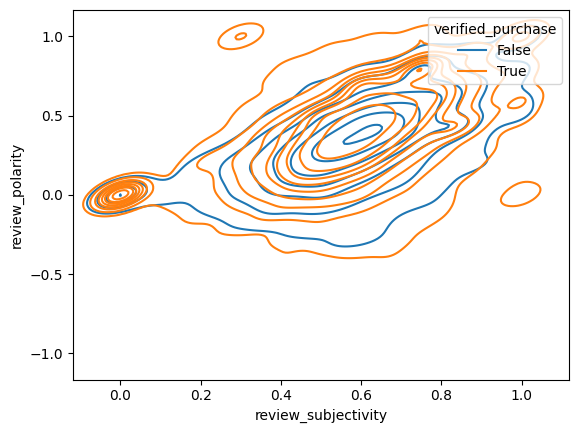

In [48]:
sns.kdeplot(
    data=full_review_list,
    x='review_subjectivity',
    y='review_polarity',hue='verified_purchase'
)

<Axes: xlabel='review_star_rating', ylabel='review_polarity'>

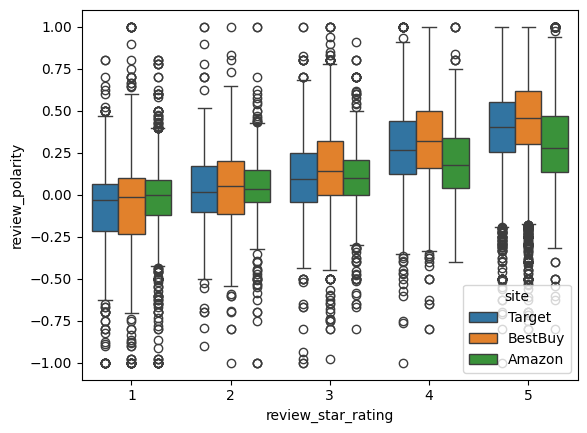

In [56]:
sns.boxplot(
    data=full_review_list,
    x='review_star_rating',y='review_polarity',hue='site',dodge=True
)

<Axes: xlabel='review_star_rating', ylabel='review_subjectivity'>

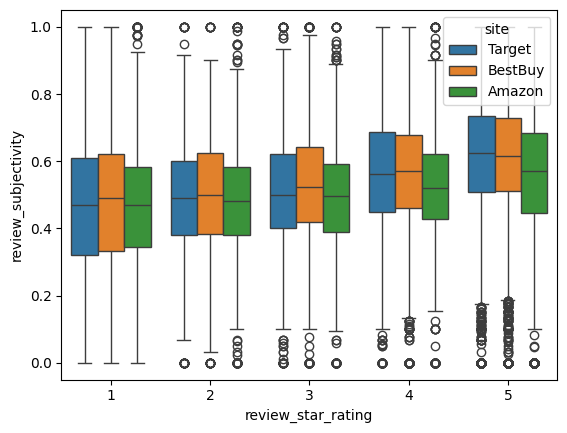

In [57]:
sns.boxplot(
    data=full_review_list,
    x='review_star_rating',y='review_subjectivity',hue='site',dodge=True
)

In [58]:
len(full_review_list[full_review_list['site']=='Amazon'])

5353

In [ ]:
#need to combine the product data, too.


#wordclouds of most common words in highly polar ratings?  highly subjective ratings?

#

<Axes: xlabel='review_star_rating', ylabel='review_polarity'>

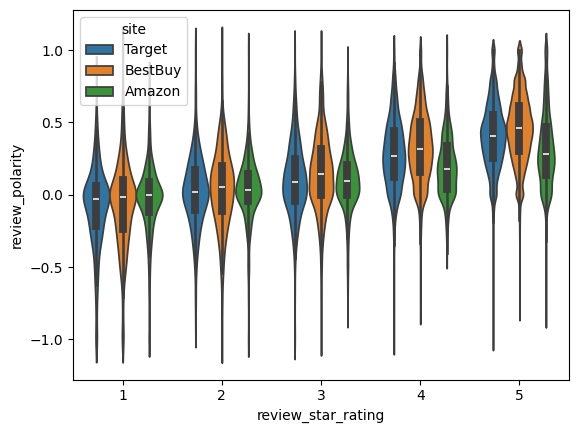

In [61]:
sns.violinplot(
    data=full_review_list,
    x='review_star_rating',
    y='review_polarity',
    hue='site',
    dodge=True
)

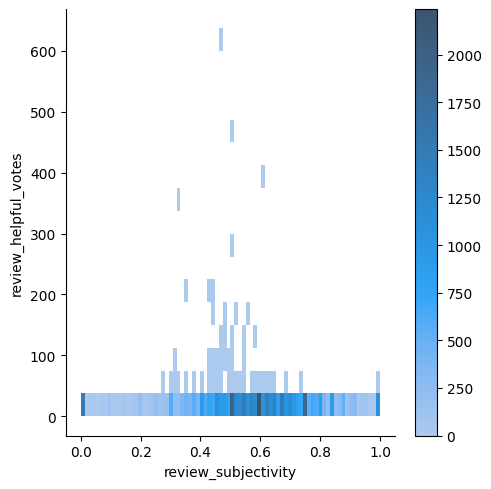

In [67]:
sns.displot(
    data=full_review_list,
    y='review_helpful_votes',
    x='review_subjectivity',
    cbar=True
)

<Axes: xlabel='review_subjectivity', ylabel='review_helpful_votes'>

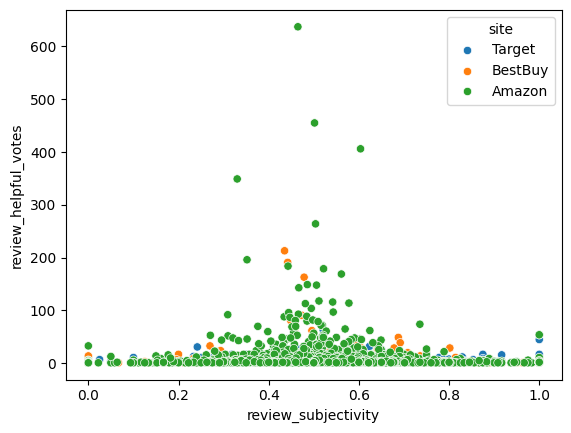

In [77]:
sns.scatterplot(
    data=full_review_list[full_review_list['review_helpful_votes']>0],
    y='review_helpful_votes',
    x='review_subjectivity',
    hue='site'
)

In [107]:
#design_matrix = np.array()

onez = np.ones(((8,1)))

design_matrix = np.hstack((np.ones((len(full_review_list),1)),np.array(full_review_list[['review_subjectivity','review_polarity','review_star_rating']])))

y = np.array(full_review_list['review_helpful_votes'])


In [111]:
np.linalg.lstsq(design_matrix,y)

C:\Users\pconn\AppData\Local\Temp\ipykernel_2240\2046709619.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(design_matrix,y)


(array([ 2.74127317, -0.15476747, -0.3609941 , -0.45632135]),
 array([1720065.3922548]),
 4,
 array([1007.62500013,   59.23769957,   57.1165978 ,   30.39577635]))

## Violin Plots

## Box Plots

## Bar Plots?

## Scatter Plots


## Word Maps For

### Most common words

### Most Common Bigrams and Trigrams

#### For 0% subjectivity

#### for 100% subjectivity

## Bivariate Plots

### Subjectivity vs. Polarity

### Filter to reviews voted useful?

## Plots of Useful Votes?

## ANOVA and Tukey Test Plot

## Strip / Swarm Plots?

##

In [215]:
full_review_list['site'].value_counts()

site
BestBuy    26190
Target     14536
Amazon      5353
Name: count, dtype: int64

In [220]:
review_metrics_target = full_review_list[full_review_list['site']=='Target'].describe().T.reset_index()
review_metrics_amazon = full_review_list[full_review_list['site']=='Amazon'].describe().T.reset_index()
review_metrics_bestbuy = full_review_list[full_review_list['site']=='BestBuy'].describe().T.reset_index()
review_cols = ['review_star_rating', 'review_helpful_votes', 'productID',
       'review_polarity', 'review_subjectivity', 'review_length']
fr = pd.DataFrame(full_review_list)
for df in [review_metrics_target,review_metrics_amazon,review_metrics_bestbuy]:
    df['IQR'] = df['75%'] - df['25%']
    df['UpperOutliers'] = df['75%'] + df['IQR']
    df['LowerOutliers'] = df['25%'] - df['IQR']

# display(
#     review_metrics_amazon,
#     review_metrics_target,
#     review_metrics_bestbuy   
# )
fr['is_outlier'] = 0
for i,row in fr.iterrows():
    mets = {
        'Amazon':review_metrics_amazon,
        'BestBuy':review_metrics_bestbuy,
        'Target':review_metrics_target
    }[row['site']]
    for col in review_cols:
        if (
            row[col] > mets[mets['index']==col].iloc[0]['UpperOutliers'] or 
            row[col] < mets[mets['index']==col].iloc[0]['LowerOutliers']
        ):
            fr.loc[i,'is_outlier']+=1
        
fr

,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length,site,ReviewID,is_outlier
0,Help with the nightmare situation.,J Fosko,When I got the phone we did not want the phone...,3,0,False,1,target1,en,0.375000,0.750000,104.0,Target,NaN,0
1,Moving it!,Nanner74,I am new to iPhones but I am loving the easy u...,5,0,False,1,target1,en,0.333939,0.667576,218.0,Target,NaN,0
2,Vice phone,Brandi R,By daughter really likes her new phone.,5,0,False,1,target1,en,0.168182,0.327273,39.0,Target,NaN,0
3,Apple Shone 14 purchase,Larry Justin,The Apple Shone 14 is well worth the price. Ea...,5,0,False,1,target1,en,0.242424,0.396970,83.0,Target,NaN,0
4,Happy,Momo3boys,It’s pretty good no different then the 13,5,0,False,1,target1,en,0.437500,0.800000,41.0,Target,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46074,Anonymous,roxanna,Only received part of the sofa. Should I expec...,1,2,True,24,Amazon24,NaN,0.000000,1.000000,64.0,Amazon,373.0,1
46075,Do not buy very uncomfortable,Savannah,Very small and uncomfortable,1,1,True,24,Amazon24,NaN,-0.412500,0.760000,28.0,Amazon,374.0,1
46076,Nice,Linda,Parts were not marked,1,2,True,24,Amazon24,NaN,-0.050000,0.600000,21.0,Amazon,375.0,0
46077,Incomplete shipping,James brown,Only came with one half,1,8,True,24,Amazon24,NaN,-0.083333,0.583333,23.0,Amazon,376.0,1


<Axes: xlabel='review_star_rating', ylabel='review_subjectivity'>

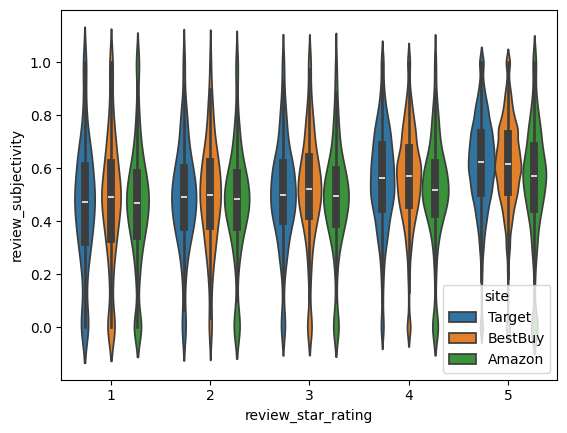

In [233]:
sns.violinplot(
    data=fr,x='review_star_rating',y='review_subjectivity',hue='site'
)


In [195]:
review_metrics = full_review_list.describe().T
review_metrics['IQR'] = review_metrics['75%'] - review_metrics['25%']
review_metrics['UpperOutliers'] = review_metrics['75%']+review_metrics['IQR']
review_metrics['LowerOutliers'] = review_metrics['25%']-review_metrics['IQR']

fr = pd.DataFrame(full_review_list)
review_cols = ['review_star_rating', 'review_helpful_votes', 'productID',
       'review_polarity', 'review_subjectivity', 'review_length']

review_metrics = review_metrics.reset_index()

fr['is_outlier'] = 0
for col in review_cols:
    for i,row in fr.iterrows():
        if (
            row[col] > review_metrics[review_metrics['index']==col].iloc[0]['UpperOutliers'] or 
            row[col] < review_metrics[review_metrics['index']==col].iloc[0]['LowerOutliers']
        ):
            fr.loc[i,'is_outlier'] +=1



,review_header,reviewer_name,review_content,review_star_rating,review_helpful_votes,verified_purchase,productID,prodSiteID,review_lang,review_polarity,review_subjectivity,review_length,site,ReviewID,is_outlier
5,West mobile phone!,Jo M,Love this phone! I bought it in a light blue c...,5,0,False,1,target1,en,0.402083,0.683333,527.0,Target,NaN,1
6,shone 14,Tmann0692,Love it!!! Great product!,5,0,False,1,target1,en,0.988281,0.675000,25.0,Target,NaN,1
26,Keeps freezing,NaN,Keeps freezing & the phone's graphics are off,1,0,False,1,target1,en,0.000000,0.000000,45.0,Target,NaN,2
27,Avoid this model,Ashlykis,"Order on installment plan, used phone for ~yea...",1,0,False,1,target1,en,-0.041667,0.416667,190.0,Target,NaN,1
28,Thank you,Boyd w,Really happy with the phone,4,0,False,1,target1,en,0.800000,1.000000,27.0,Target,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46074,Anonymous,roxanna,Only received part of the sofa. Should I expec...,1,2,True,24,Amazon24,NaN,0.000000,1.000000,64.0,Amazon,373.0,4
46075,Do not buy very uncomfortable,Savannah,Very small and uncomfortable,1,1,True,24,Amazon24,NaN,-0.412500,0.760000,28.0,Amazon,374.0,4
46076,Nice,Linda,Parts were not marked,1,2,True,24,Amazon24,NaN,-0.050000,0.600000,21.0,Amazon,375.0,3
46077,Incomplete shipping,James brown,Only came with one half,1,8,True,24,Amazon24,NaN,-0.083333,0.583333,23.0,Amazon,376.0,3


c:\Users\pconn\miniconda3\lib\site-packages\pingouin\parametric.py:1346: RuntimeWarning: invalid value encountered in scalar divide
  adj_grandmean = (weights * grp.mean(numeric_only=True)).sum() / weights.sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,6347.075436,0.0,1.0,0.392992


,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,8493.740751,2727.798595,0.0,0.147338


,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,8301.335843,570.429206,7.483725e-233,0.036813


,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,9162.724477,547.336509,2.855731e-225,0.152353


,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,8258.666667,644.226099,1.016941e-260,0.272393


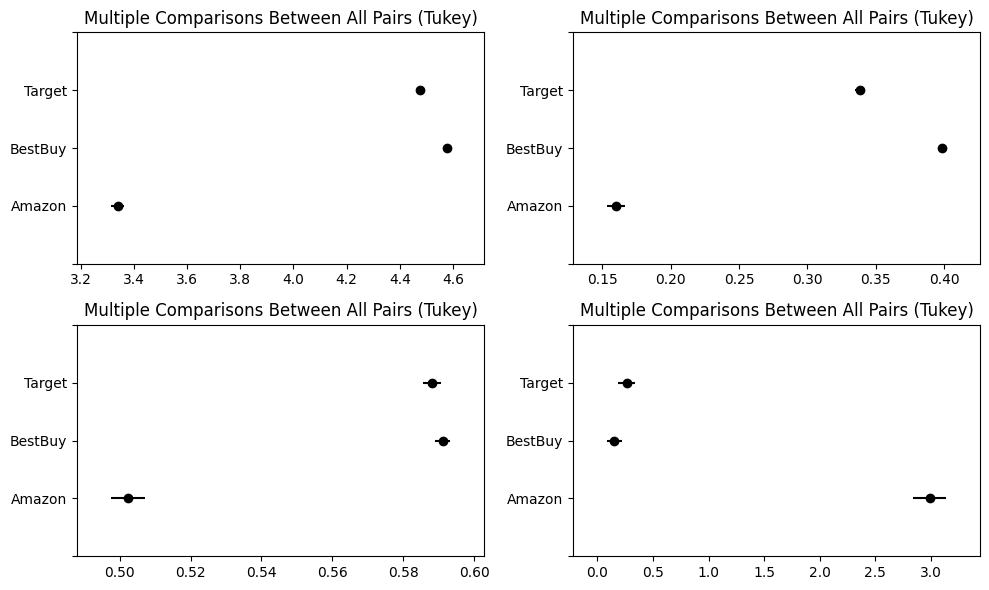

In [221]:
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

no_outlier_data = pd.DataFrame(fr[fr['is_outlier']==0])
display(
## is there a significant difference in the star ratings on one site vs. another?
    pg.welch_anova(
        data=no_outlier_data,between='site',dv='review_star_rating'
    ),
## is there a significant difference in the polarity of reviews for one site vs. another?
    pg.welch_anova(
        data=no_outlier_data,between='site',dv='review_polarity'
    ),
## is there a significant difference in the subjectivity of reviews on one site vs. another?
    pg.welch_anova(
        data=no_outlier_data,between='site',dv='review_subjectivity'
    ),
    pg.welch_anova(
        data=no_outlier_data,between='site',dv='review_length'
    ),
    pg.welch_anova(
        data=no_outlier_data,between='site',dv='review_helpful_votes'
    )
)

star = pairwise_tukeyhsd(
    endog=fr['review_star_rating'],
    groups=fr['site'],
    alpha=0.05
)
pol = pairwise_tukeyhsd(
    endog=fr['review_polarity'],
    groups=fr['site'],
    alpha=0.05
)
subj = pairwise_tukeyhsd(
    endog=fr['review_subjectivity'],
    groups=fr['site'],
    alpha=0.05
)
# rev_len = pairwise_tukeyhsd(
#     endog=fr['review_length'],
#     groups=fr['site'],
#     alpha=0.05
# )
help_votes = pairwise_tukeyhsd(
    endog=fr['review_helpful_votes'],
    groups=fr['site'],
    alpha=0.05
)
fig,ax = plt.subplots(nrows=2,ncols=2)
star.plot_simultaneous(ax=ax[0,0])
pol.plot_simultaneous(ax=ax[0,1])
subj.plot_simultaneous(ax=ax[1,0])
#rev_len.plot_simultaneous()
help_votes.plot_simultaneous(ax=ax[1,1])
plt.tight_layout()
plt.show()

<Axes: xlabel='review_subjectivity', ylabel='review_polarity'>

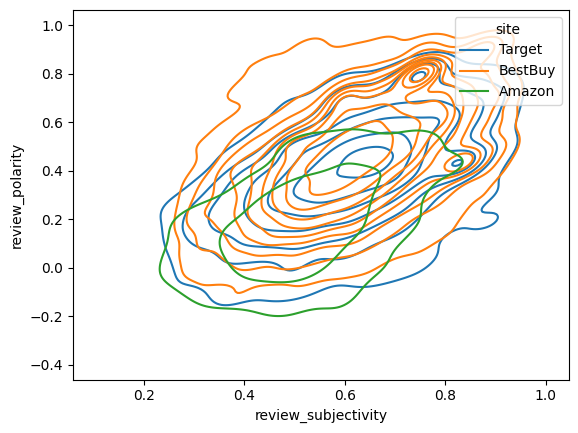

In [222]:
sns.kdeplot(
    data=no_outlier_data,
    x='review_subjectivity',y='review_polarity',hue='site'
)

<Axes: xlabel='review_star_rating', ylabel='review_subjectivity'>

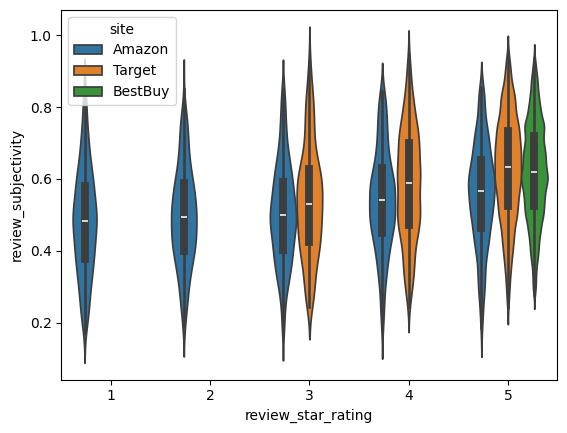

In [223]:
sns.violinplot(
    data=no_outlier_data,
    x='review_star_rating',
    y='review_subjectivity',
    hue='site'
)

<Axes: xlabel='review_star_rating', ylabel='review_polarity'>

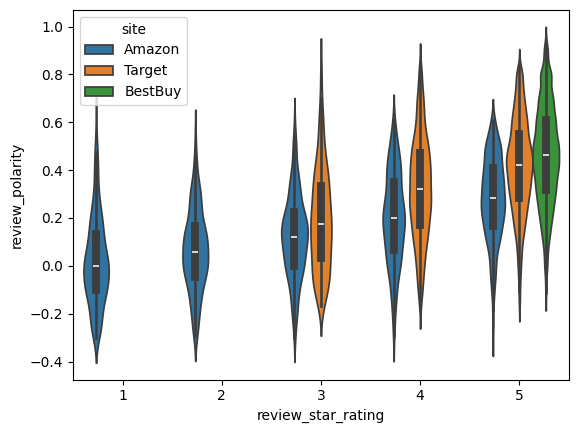

In [224]:
sns.violinplot(
    data=no_outlier_data,
    x='review_star_rating',
    y='review_polarity',
    hue='site'
)

In [144]:


fr = pd.DataFrame(full_review_list)

#questions
display(
## is there a significant difference in the star ratings on one site vs. another?
    pg.welch_anova(
        data=fr,between='site',dv='review_star_rating'
    ),
## is there a significant difference in the polarity of reviews for one site vs. another?
    pg.welch_anova(
        data=fr,between='site',dv='review_polarity'
    ),
## is there a significant difference in the subjectivity of reviews on one site vs. another?
    pg.welch_anova(
        data=fr,between='site',dv='review_subjectivity'
    )
)



,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,12796.347035,1542.062438,0.0,0.120648


,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,14402.836028,1676.71526,0.0,0.068117


,Source,ddof1,ddof2,F,p-unc,np2
0,site,2,13770.558408,376.383712,7.079661e-160,0.020157


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
 Amazon BestBuy   1.2382   0.0  1.2014   1.275   True
 Amazon  Target   1.1354   0.0  1.0962  1.1746   True
BestBuy  Target  -0.1028   0.0 -0.1282 -0.0774   True
-----------------------------------------------------


Text(0, 0.5, 'E-Commerce Platform')

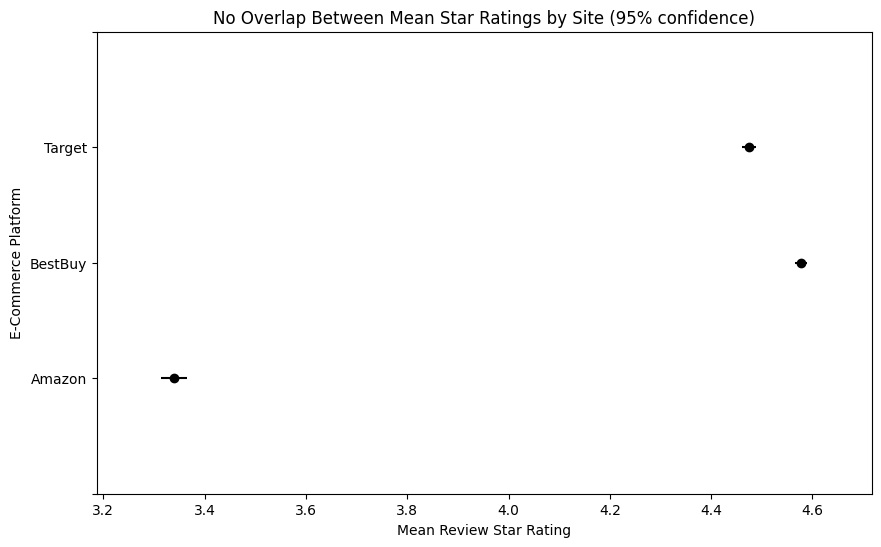

In [145]:
# col_data = [
#     ('stars',''),
#     ('subjectivity',''),
#     ('polarity','')
# ]
# for col in col_data:
star = pairwise_tukeyhsd(
    endog=fr['review_star_rating'],
    groups=fr['site'],
    alpha=0.05
)

print(star.summary())
star.plot_simultaneous()
plt.title('No Overlap Between Mean Star Ratings by Site (95% confidence)')
plt.xlabel('Mean Review Star Rating')
plt.ylabel('E-Commerce Platform')

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 Amazon BestBuy   0.0888    0.0  0.0819 0.0957   True
 Amazon  Target   0.0858    0.0  0.0784 0.0931   True
BestBuy  Target   -0.003 0.3044 -0.0077 0.0018  False
-----------------------------------------------------


Text(0, 0.5, 'E-Commerce Platform')

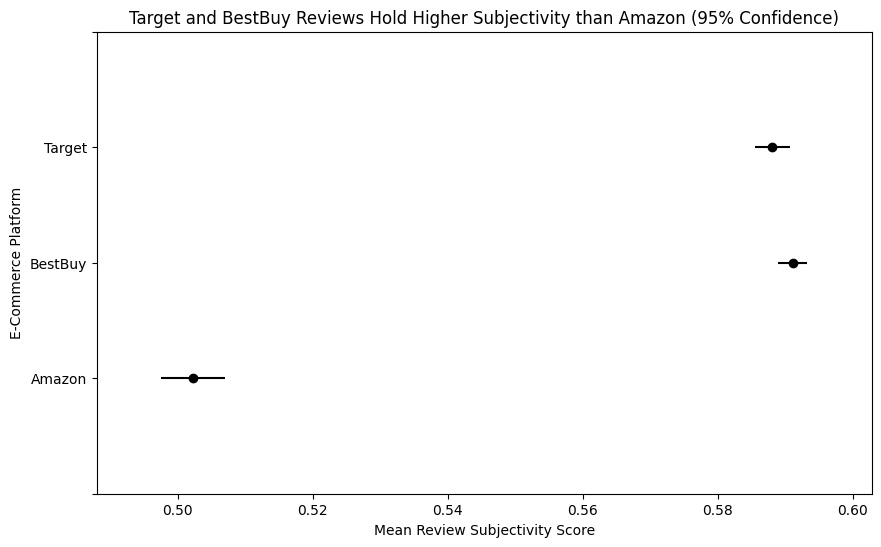

In [146]:
subj = pairwise_tukeyhsd(
    endog=fr['review_subjectivity'],
    groups=fr['site'],
    alpha=0.05
)
subj.plot_simultaneous()
print(subj.summary())
plt.title('Target and BestBuy Reviews Hold Higher Subjectivity than Amazon (95% Confidence)')
plt.xlabel('Mean Review Subjectivity Score')
plt.ylabel('E-Commerce Platform')

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower  upper  reject
----------------------------------------------------
 Amazon BestBuy   0.2385   0.0  0.2288 0.2482   True
 Amazon  Target   0.1788   0.0  0.1685 0.1892   True
BestBuy  Target  -0.0597   0.0 -0.0664 -0.053   True
----------------------------------------------------


Text(0, 0.5, 'E-Commerce Platform')

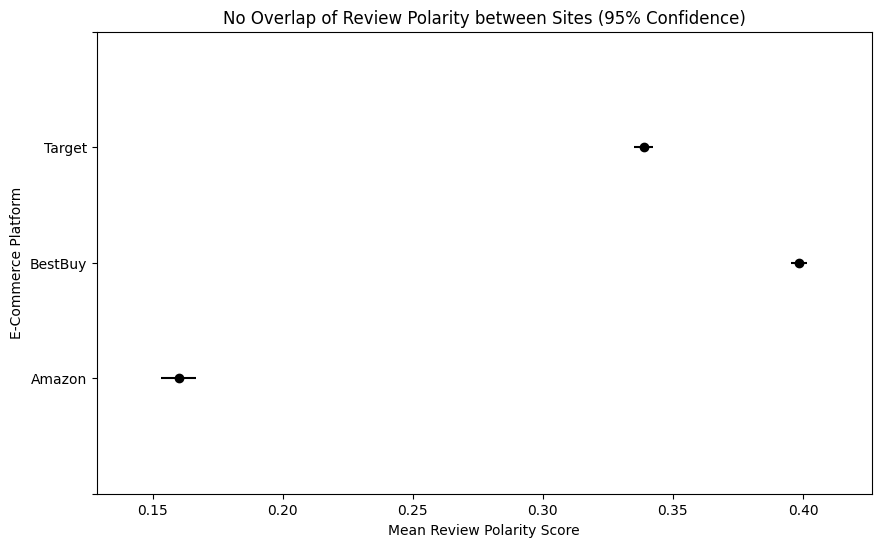

In [147]:
pol = pairwise_tukeyhsd(
    endog=fr['review_polarity'],
    groups=fr['site'],
    alpha=0.05
)
pol.plot_simultaneous()
print(pol.summary())
plt.title('No Overlap of Review Polarity between Sites (95% Confidence)')
plt.xlabel('Mean Review Polarity Score')
plt.ylabel('E-Commerce Platform')

In [175]:
#fig,ax = plt.subplots(nrows=1,ncols=3)
def tukey_to_df(tukey_test,test_name,cols=None):
    df = pd.DataFrame(tukey_test.summary())
    header = df.iloc[0]
    df = df[1:]
    df.columns = header
    df['tukey_test']=test_name
    if cols is not None:
        df.columns = cols
    return pd.DataFrame(df)

# pd.concat(
#     [
#         tukey_to_df(pol,'polarity'),
#         tukey_to_df(subj,'subjectivity'),
#         tukey_to_df(star,'star_rating')
#     ]
# )


test_pol = tukey_to_df(pol,'polarity')
cols = test_pol.columns
test_subj = tukey_to_df(subj,'subjectivity',cols)
test_star = tukey_to_df(star,'star_rating',cols)

display(
    test_pol,test_subj,test_star
)

# polarity_tests = pd.DataFrame(pol.summary())
# header = polarity_tests.iloc[0]
# polarity_tests = polarity_tests[1:]
# polarity_tests.columns = header
# polarity_tests

,group1,group2,meandiff,p-adj,lower,upper,reject,tukey_test
1,Amazon,BestBuy,0.2385,0.0,0.2288,0.2482,True,polarity
2,Amazon,Target,0.1788,0.0,0.1685,0.1892,True,polarity
3,BestBuy,Target,-0.0597,0.0,-0.0664,-0.053,True,polarity


,group1,group2,meandiff,p-adj,lower,upper,reject,tukey_test
1,Amazon,BestBuy,0.0888,0.0,0.0819,0.0957,True,subjectivity
2,Amazon,Target,0.0858,0.0,0.0784,0.0931,True,subjectivity
3,BestBuy,Target,-0.003,0.3044,-0.0077,0.0018,False,subjectivity


,group1,group2,meandiff,p-adj,lower,upper,reject,tukey_test
1,Amazon,BestBuy,1.2382,0.0,1.2014,1.275,True,star_rating
2,Amazon,Target,1.1354,0.0,1.0962,1.1746,True,star_rating
3,BestBuy,Target,-0.1028,0.0,-0.1282,-0.0774,True,star_rating


In [178]:
test_data = pd.concat([test_star,test_subj,test_pol])

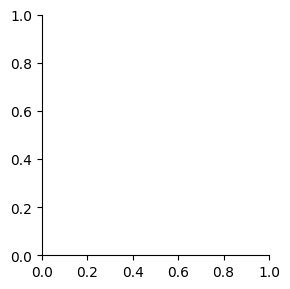

In [179]:
grid = sns.FacetGrid(
    data=test_data
)


In [180]:
test_data

,group1,group2,meandiff,p-adj,lower,upper,reject,tukey_test
1,Amazon,BestBuy,1.2382,0.0,1.2014,1.275,True,star_rating
2,Amazon,Target,1.1354,0.0,1.0962,1.1746,True,star_rating
3,BestBuy,Target,-0.1028,0.0,-0.1282,-0.0774,True,star_rating
1,Amazon,BestBuy,0.0888,0.0,0.0819,0.0957,True,subjectivity
2,Amazon,Target,0.0858,0.0,0.0784,0.0931,True,subjectivity
3,BestBuy,Target,-0.003,0.3044,-0.0077,0.0018,False,subjectivity
1,Amazon,BestBuy,0.2385,0.0,0.2288,0.2482,True,polarity
2,Amazon,Target,0.1788,0.0,0.1685,0.1892,True,polarity
3,BestBuy,Target,-0.0597,0.0,-0.0664,-0.053,True,polarity


TypeError: Invalid object type at position 0

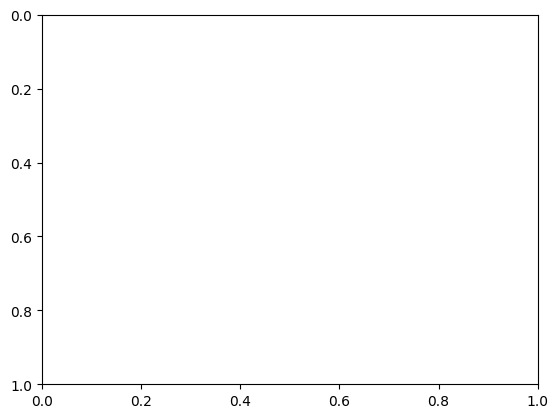

In [185]:
sns.lineplot(
    test_data[test_data['tukey_test']=='polarity'],
    x = test_data.columns[4],
    y = test_data.columns[0]
)